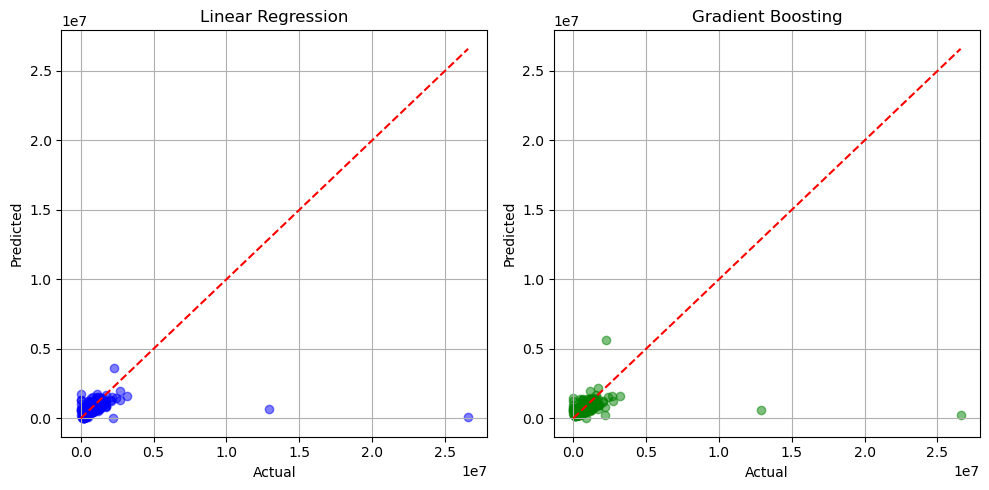

Linear Regression MAE: 179845.82014587114
Linear Regression RMSE: 990128.95695162
Gradient Boosting MAE: 177364.87501544398
Gradient Boosting RMSE: 991811.3073396152


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("data.csv")

# Select features and target
features = df[['sqft_living', 'bedrooms', 'bathrooms', 'city']]
target = df['price']

# One-hot encode 'city'
features_encoded = pd.get_dummies(features, columns=['city'], drop_first=True)

# Handle missing values
features_encoded.fillna(0, inplace=True)
target.fillna(0, inplace=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

# Visualize predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Linear Regression')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Gradient Boosting')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print results
print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)
